In [4]:
import numpy as np
import pandas as pd

In [5]:
train = pd.read_csv('data/train.csv', parse_dates=['datetime'])
test = pd.read_csv('data/test.csv', parse_dates=['datetime'])
sub = pd.read_csv('data/sampleSubmission.csv')

train.shape, test.shape, sub.shape

((10886, 12), (6493, 9), (6493, 2))

In [6]:
sub.columns

Index(['datetime', 'count'], dtype='object')

In [7]:
import matplotlib.pyplot as plt ## seaborn 보다 고급 시각화 가능. but 코드 복잡
import seaborn as sns           ## seaborn은 matplotlib보다 간단하게 사용 가능

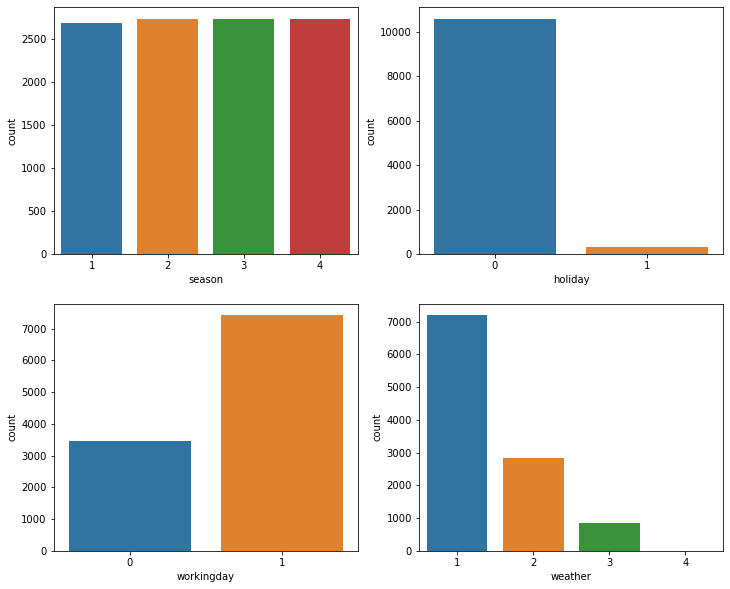

In [8]:
col_names = [ 'season', 'holiday', 'workingday', 'weather'  ]
i = 0
plt.figure(figsize=(12,10))   # 전체 그래프의 크기 지정 

for name in col_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회 
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(2,2,i)        # 2행 2열에 i번째 그래프 선택
    sns.countplot(x=name, data=train)  # i번째 그래프에 sns.countplot를 그리겠다.
    
plt.show()  # 주피터에서 보여주지만, 다른곳(editor, pycharm)에서는 이걸 실행시켜야 한다.

In [9]:
### temp, atemp, humidity, windspeed

num_names = ['temp', 'atemp', 'humidity', 'windspeed']
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

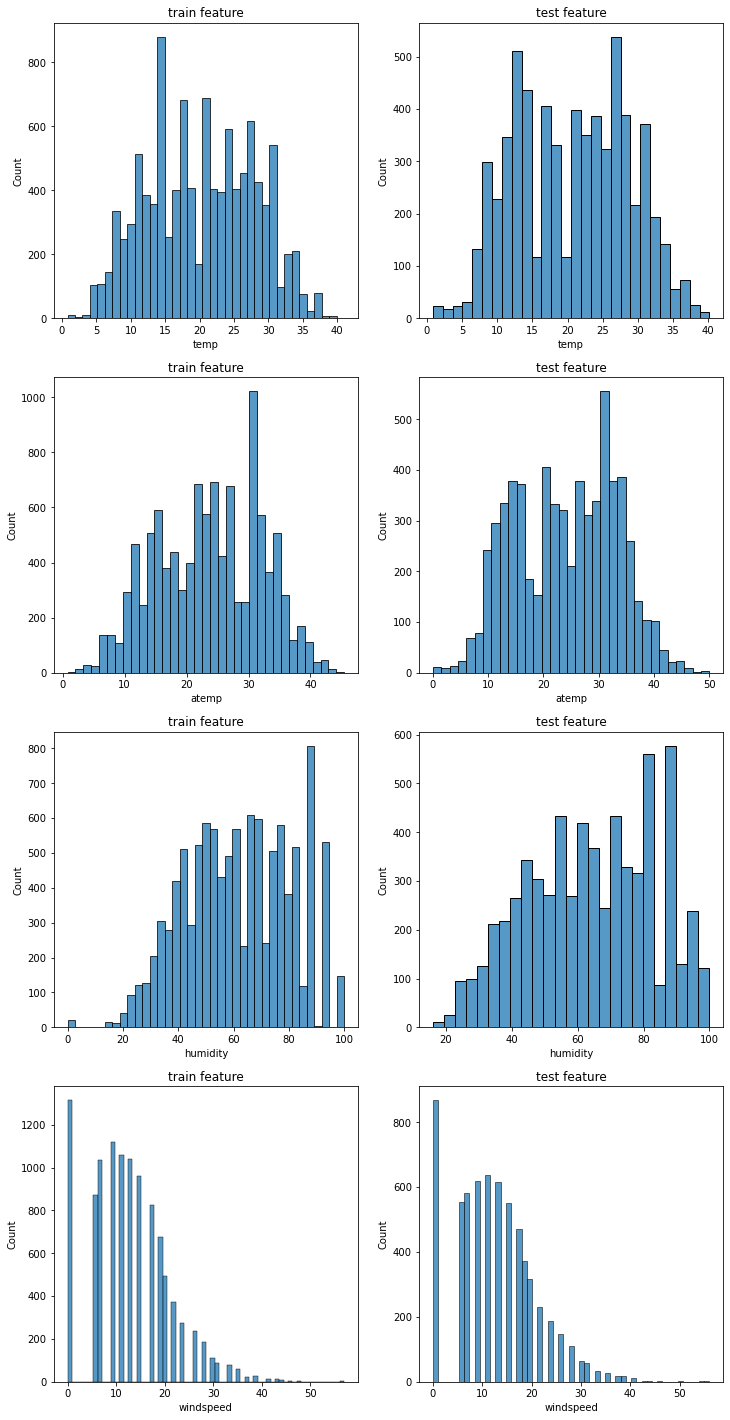

In [10]:
i = 0
plt.figure(figsize=(12,25))   # 전체 그래프의 크기 지정 (가로, 세로)

for name in num_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(4,2,i*2-1)        # 2행 2열에 i번째 그래프 선택
    sns.histplot(x=name, data=train)  # i번째 그래프에 sns.histplot를 그리겠다.
    plt.title("train feature")
    
    plt.subplot(4,2,i*2)        # 2행 2열에 i번째 그래프 선택
    sns.histplot(x=name, data=test)  # i번째 그래프에 sns.histplot를 그리겠다.
    plt.title("test feature")
    
plt.show()

In [11]:
new_tr = train.copy()   # 데이터 백업
new_test = test.copy()
new_tr.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [12]:
## 더미변수, 파생변수 생성
new_tr['year'] = new_tr['datetime'].dt.year
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011


In [13]:
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [14]:
new_test['year'] = new_test['datetime'].dt.year
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['hour'] = new_test['datetime'].dt.hour
new_test['minute'] = new_test['datetime'].dt.minute
new_test['second'] = new_test['datetime'].dt.second
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek
new_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3


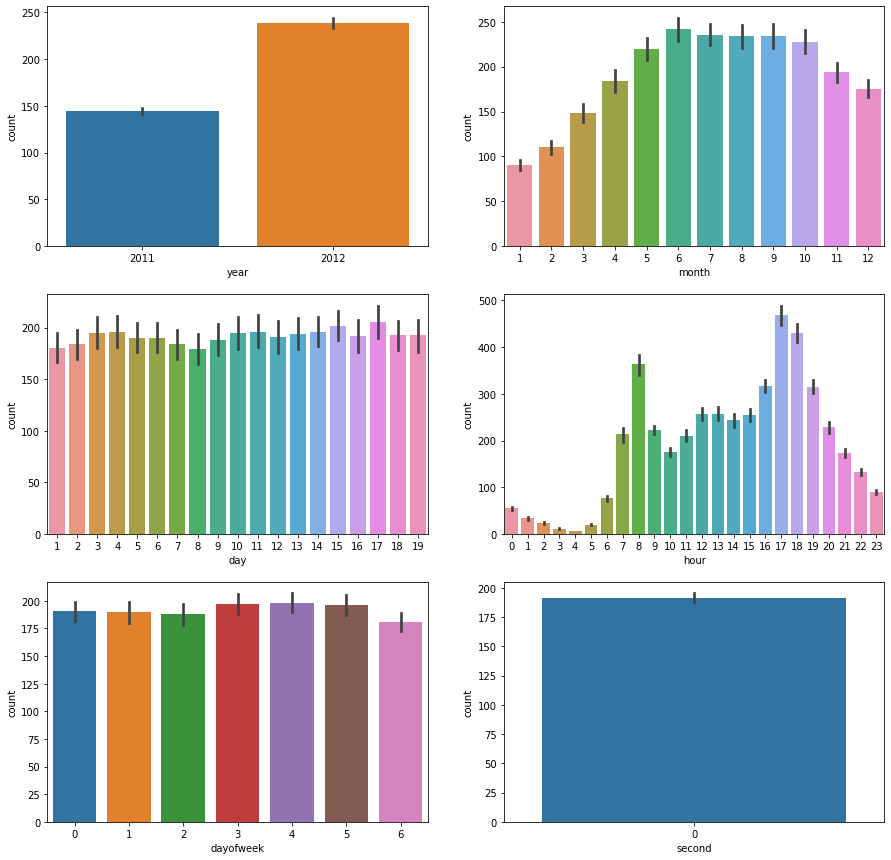

In [15]:
datetime_names = ['year', 'month', 'day', 'hour', 'dayofweek', 'second']

i=0
plt.figure(figsize=(15,15))
for name in datetime_names:
    i = i + 1
    plt.subplot(3,2,i)
    sns.barplot(x=name, y='count', data=new_tr)
    
plt.show()

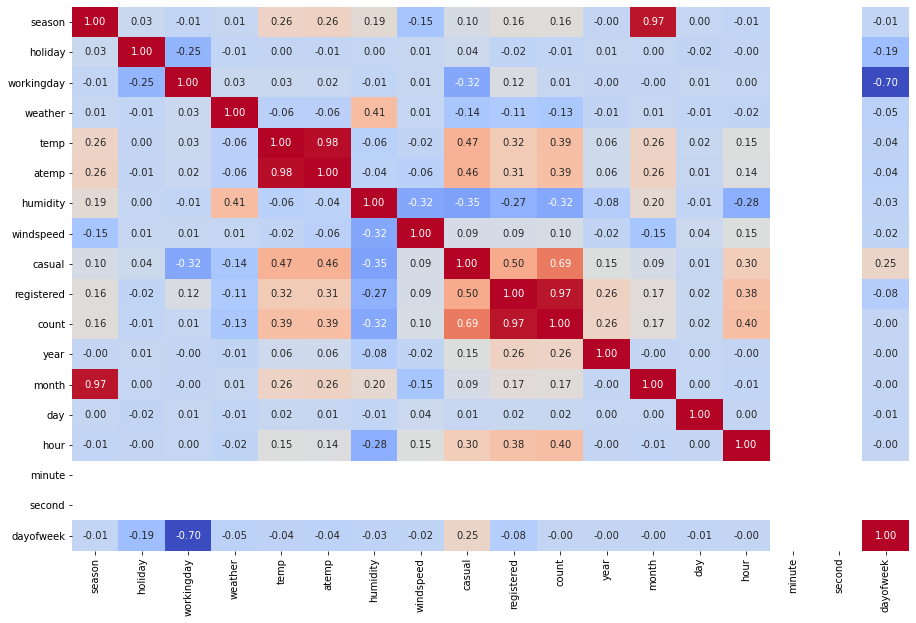

In [16]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_tr.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=False)

# 비선형 변환

In [17]:
# new_tr의 log 적용 값 생성
new_tr['log_count'] = np.log1p(new_tr['count'])

<AxesSubplot:xlabel='log_count', ylabel='Count'>

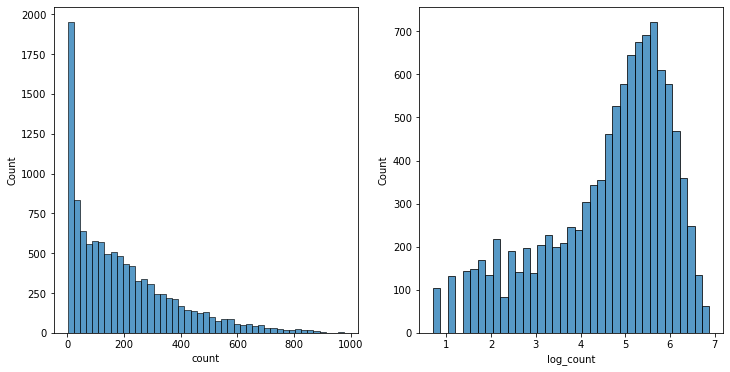

In [18]:
# log 적용 전 후 비교
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(x='count',data=new_tr)

plt.subplot(1,2,2)
sns.histplot(x='log_count',data=new_tr)

In [19]:
feature_names = [ 'season', 'holiday', 'workingday', 'weather', 
                  'temp', 'atemp', 'humidity', 'windspeed', 
                  "year", "hour", "dayofweek"]  # 공통 변수

X_tr_all = new_tr[feature_names]  # 학습용 데이터 변수 선택
y_tr_all = new_tr["log_count"]        # 렌탈 대수 변수 값 선택

X_test_all = new_test[feature_names]    # 테스트 데이터의 변수 선택

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_tr_all, 
                                                    y_tr_all,
                                                    test_size=0.3,
                                                    random_state=77)

In [22]:
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor   # 앙상블(의사결정트리 확장판)
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
# 선형회귀 모델 훈련 및 평가
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# 결정계수 확인
print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

mse_val = ((pred-y_test) ** 2).sum() / len(pred)
print('MSE : {:.3f}'.format(mse_val))

학습용 데이터 결정계수: 0.490
테스트 데이터 결정계수: 0.474
MSE : 1.047


In [24]:
# 의사결정트리 모델 훈련 및 평가
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
pred= model.predict(X_test)

# 결정계수 확인
print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

mse_val = ((pred-y_test) ** 2).sum() / len(pred)
print('MSE : {:.3f}'.format(mse_val))

학습용 데이터 결정계수: 1.000
테스트 데이터 결정계수: 0.900
MSE : 0.199


In [25]:
# 랜덤포레스트 모델 훈련 및 평가
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred= model.predict(X_test)

# 결정계수 확인
print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

mse_val = ((pred-y_test) ** 2).sum() / len(pred)
print('MSE : {:.3f}'.format(mse_val))

학습용 데이터 결정계수: 0.993
테스트 데이터 결정계수: 0.954
MSE : 0.092


In [26]:
# 그래디언트 부스팅 모델 훈련 및 평가
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
pred= model.predict(X_test)

# 결정계수 확인
print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

mse_val = ((pred-y_test) ** 2).sum() / len(pred)
print('MSE : {:.3f}'.format(mse_val))

학습용 데이터 결정계수: 0.921
테스트 데이터 결정계수: 0.919
MSE : 0.162


### 최적의 모델 선택
* 랜덤 포레스트 모델

In [27]:
# 랜덤포레스트 모델 훈련 및 평가
for i in range(1,6):
    for d in range(1,5):
        X_train, X_test, y_train, y_test = train_test_split(X_tr_all, 
                                                    y_tr_all,
                                                    test_size=(i/10),
                                                    random_state=77)
    
        model = RandomForestRegressor(n_jobs=-1, max_depth=d, random_state=0)
        model.fit(X_train, y_train)
        pred= model.predict(X_test)

        # 결정계수 확인
        print(f'훈련:테스트 = {10-i}:{i}, max_depth = {d}')
        print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
        print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

        mse_val = ((pred-y_test) ** 2).sum() / len(pred)
        print('MSE : {:.3f}'.format(mse_val))
        print()

훈련:테스트 = 9:1, max_depth = 1
학습용 데이터 결정계수: 0.593
테스트 데이터 결정계수: 0.609
MSE : 0.805

훈련:테스트 = 9:1, max_depth = 2
학습용 데이터 결정계수: 0.665
테스트 데이터 결정계수: 0.677
MSE : 0.666

훈련:테스트 = 9:1, max_depth = 3
학습용 데이터 결정계수: 0.748
테스트 데이터 결정계수: 0.755
MSE : 0.505

훈련:테스트 = 9:1, max_depth = 4
학습용 데이터 결정계수: 0.800
테스트 데이터 결정계수: 0.810
MSE : 0.391

훈련:테스트 = 8:2, max_depth = 1
학습용 데이터 결정계수: 0.587
테스트 데이터 결정계수: 0.594
MSE : 0.818

훈련:테스트 = 8:2, max_depth = 2
학습용 데이터 결정계수: 0.661
테스트 데이터 결정계수: 0.667
MSE : 0.672

훈련:테스트 = 8:2, max_depth = 3
학습용 데이터 결정계수: 0.746
테스트 데이터 결정계수: 0.749
MSE : 0.506

훈련:테스트 = 8:2, max_depth = 4
학습용 데이터 결정계수: 0.797
테스트 데이터 결정계수: 0.802
MSE : 0.399

훈련:테스트 = 7:3, max_depth = 1
학습용 데이터 결정계수: 0.588
테스트 데이터 결정계수: 0.592
MSE : 0.813

훈련:테스트 = 7:3, max_depth = 2
학습용 데이터 결정계수: 0.661
테스트 데이터 결정계수: 0.667
MSE : 0.662

훈련:테스트 = 7:3, max_depth = 3
학습용 데이터 결정계수: 0.744
테스트 데이터 결정계수: 0.746
MSE : 0.506

훈련:테스트 = 7:3, max_depth = 4
학습용 데이터 결정계수: 0.797
테스트 데이터 결정계수: 0.800
MSE : 0.399

훈련:테스트 = 6:4, max_depth = 1


In [28]:
# max_depth : 5-10
for i in range(1,6):
    for d in range(5,11):
        X_train, X_test, y_train, y_test = train_test_split(X_tr_all, 
                                                    y_tr_all,
                                                    test_size=(i/10),
                                                    random_state=77)
    
        model = RandomForestRegressor(n_jobs=-1, max_depth=d, random_state=0)
        model.fit(X_train, y_train)
        pred= model.predict(X_test)

        # 결정계수 확인
        print(f'훈련:테스트 = {10-i}:{i}, max_depth = {d}')
        print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
        print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

        mse_val = ((pred-y_test) ** 2).sum() / len(pred)
        print('MSE : {:.3f}'.format(mse_val))
        print()

훈련:테스트 = 9:1, max_depth = 5
학습용 데이터 결정계수: 0.851
테스트 데이터 결정계수: 0.861
MSE : 0.286

훈련:테스트 = 9:1, max_depth = 6
학습용 데이터 결정계수: 0.881
테스트 데이터 결정계수: 0.888
MSE : 0.230

훈련:테스트 = 9:1, max_depth = 7
학습용 데이터 결정계수: 0.907
테스트 데이터 결정계수: 0.907
MSE : 0.191

훈련:테스트 = 9:1, max_depth = 8
학습용 데이터 결정계수: 0.934
테스트 데이터 결정계수: 0.928
MSE : 0.148

훈련:테스트 = 9:1, max_depth = 9
학습용 데이터 결정계수: 0.954
테스트 데이터 결정계수: 0.943
MSE : 0.118

훈련:테스트 = 9:1, max_depth = 10
학습용 데이터 결정계수: 0.967
테스트 데이터 결정계수: 0.951
MSE : 0.100

훈련:테스트 = 8:2, max_depth = 5
학습용 데이터 결정계수: 0.851
테스트 데이터 결정계수: 0.855
MSE : 0.293

훈련:테스트 = 8:2, max_depth = 6
학습용 데이터 결정계수: 0.883
테스트 데이터 결정계수: 0.883
MSE : 0.236

훈련:테스트 = 8:2, max_depth = 7
학습용 데이터 결정계수: 0.909
테스트 데이터 결정계수: 0.902
MSE : 0.197

훈련:테스트 = 8:2, max_depth = 8
학습용 데이터 결정계수: 0.935
테스트 데이터 결정계수: 0.923
MSE : 0.156

훈련:테스트 = 8:2, max_depth = 9
학습용 데이터 결정계수: 0.955
테스트 데이터 결정계수: 0.938
MSE : 0.124

훈련:테스트 = 8:2, max_depth = 10
학습용 데이터 결정계수: 0.968
테스트 데이터 결정계수: 0.947
MSE : 0.106

훈련:테스트 = 7:3, max_depth = 

In [29]:
# test_size => 9:1, 8:2
# max_depth => 8이상 8-13
for i in range(1,3):
    for d in range(8,14):
        X_train, X_test, y_train, y_test = train_test_split(X_tr_all, 
                                                    y_tr_all,
                                                    test_size=(i/10),
                                                    random_state=77)
    
        model = RandomForestRegressor(n_jobs=-1, max_depth=d, random_state=0)
        model.fit(X_train, y_train)
        pred= model.predict(X_test)

        # 결정계수 확인
        print(f'훈련:테스트 = {10-i}:{i}, max_depth = {d}')
        print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
        print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

        mse_val = ((pred-y_test) ** 2).sum() / len(pred)
        print('MSE : {:.3f}'.format(mse_val))
        print()

훈련:테스트 = 9:1, max_depth = 8
학습용 데이터 결정계수: 0.934
테스트 데이터 결정계수: 0.928
MSE : 0.148

훈련:테스트 = 9:1, max_depth = 9
학습용 데이터 결정계수: 0.954
테스트 데이터 결정계수: 0.943
MSE : 0.118

훈련:테스트 = 9:1, max_depth = 10
학습용 데이터 결정계수: 0.967
테스트 데이터 결정계수: 0.951
MSE : 0.100

훈련:테스트 = 9:1, max_depth = 11
학습용 데이터 결정계수: 0.976
테스트 데이터 결정계수: 0.956
MSE : 0.092

훈련:테스트 = 9:1, max_depth = 12
학습용 데이터 결정계수: 0.982
테스트 데이터 결정계수: 0.958
MSE : 0.087

훈련:테스트 = 9:1, max_depth = 13
학습용 데이터 결정계수: 0.986
테스트 데이터 결정계수: 0.959
MSE : 0.084

훈련:테스트 = 8:2, max_depth = 8
학습용 데이터 결정계수: 0.935
테스트 데이터 결정계수: 0.923
MSE : 0.156

훈련:테스트 = 8:2, max_depth = 9
학습용 데이터 결정계수: 0.955
테스트 데이터 결정계수: 0.938
MSE : 0.124

훈련:테스트 = 8:2, max_depth = 10
학습용 데이터 결정계수: 0.968
테스트 데이터 결정계수: 0.947
MSE : 0.106

훈련:테스트 = 8:2, max_depth = 11
학습용 데이터 결정계수: 0.977
테스트 데이터 결정계수: 0.952
MSE : 0.097

훈련:테스트 = 8:2, max_depth = 12
학습용 데이터 결정계수: 0.983
테스트 데이터 결정계수: 0.955
MSE : 0.092

훈련:테스트 = 8:2, max_depth = 13
학습용 데이터 결정계수: 0.987
테스트 데이터 결정계수: 0.955
MSE : 0.090



In [30]:
# test_size => 9:1, 8:2
# max_depth => 기본
for i in range(1,3):
    X_train, X_test, y_train, y_test = train_test_split(X_tr_all, 
                                                        y_tr_all,
                                                        test_size=(i/10),
                                                        random_state=77)
    
    model = RandomForestRegressor(n_jobs=-1, random_state=0)
    model.fit(X_train, y_train)
    pred= model.predict(X_test)

    # 결정계수 확인
    print(f'훈련:테스트 = {10-i}:{i}')
    print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
    print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

    mse_val = ((pred-y_test) ** 2).sum() / len(pred)
    print('MSE : {:.3f}'.format(mse_val))
    print()

훈련:테스트 = 9:1
학습용 데이터 결정계수: 0.993
테스트 데이터 결정계수: 0.959
MSE : 0.084

훈련:테스트 = 8:2
학습용 데이터 결정계수: 0.993
테스트 데이터 결정계수: 0.957
MSE : 0.088



In [31]:
# test_size => 9:1
# max_depth => 기본


X_train, X_test, y_train, y_test = train_test_split(X_tr_all, 
                                                    y_tr_all,
                                                    test_size=0.1,
                                                    random_state=77)

model = RandomForestRegressor(n_jobs=-1, random_state=0)
model.fit(X_train, y_train)
pred= model.predict(X_test)

# 결정계수 확인
print(f'훈련:테스트 = 9:1')
print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

mse_val = ((pred-y_test) ** 2).sum() / len(pred)
print('MSE : {:.3f}'.format(mse_val))
print()

훈련:테스트 = 9:1
학습용 데이터 결정계수: 0.993
테스트 데이터 결정계수: 0.959
MSE : 0.084



In [32]:
pred = model.predict(X_test_all)   # 예측
sub['count'] = np.expm1(pred) # 자연로그를 원상복귀해 준 뒤 -1 해주는 함수
sub.loc[sub['count'] < 0, 'count'] = 0
sub.head(3)

,datetime,count
0,2011-01-20 00:00:00,10.451132
1,2011-01-20 01:00:00,4.966102
2,2011-01-20 02:00:00,3.379628


In [33]:
# 처음 만는 제출용 csv 파일, 행번호를 없애기
sub.to_csv("sub03_log.csv", index=False)

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
# test_size => 9:1
# max_depth => 기본

X_train, X_test, y_train, y_test = train_test_split(X_tr_all, 
                                                    y_tr_all,
                                                    test_size=0.1,
                                                    random_state=77)

model = RandomForestRegressor(n_jobs=-1, random_state=0)
model.fit(X_train, y_train)
pred= model.predict(X_test)

# 결정계수 확인
print(f'훈련:테스트 = 9:1')
print('교차검증 수 = 3')
tr_score = cross_val_score(model, X_train, y_train, cv=3).mean()
test_score = cross_val_score(model, X_test, y_test, cv=3).mean()
print("학습용 데이터 결정계수: {:.3f}".format(tr_score))
print("테스트 데이터 결정계수: {:.3f}".format(test_score))

mse_val = ((pred-y_test) ** 2).sum() / len(pred)
print('MSE : {:.3f}'.format(mse_val))
print()

훈련:테스트 = 9:1
교차검증 수 = 3
학습용 데이터 결정계수: 0.948
테스트 데이터 결정계수: 0.897
MSE : 0.084

